In this project, we will be going through data from matches played as Lands over a number the course of this year.

In [101]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# # reading the csv's
old_df = pd.read_csv('D:\kcali\Lands\Lands_Data_8.21\data\old_matches.csv')
new_df = pd.read_csv('D:\kcali\Lands\Lands_Data_8.21\data\\new_matches.csv')
df = old_df.append(new_df, ignore_index=True)
# consolidating macro-archetypes
df['Opp Category'] = df['Opp Category'].map(str)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Show & Tell' if x == 'Show And Tell' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Brew/Other' if x == 'Unk' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Brew/Other' if x == 'Brew' else x)
# df['Opp Category'] = df['Opp Category'].map(lambda x: 'Dark Depths' if x == 'Lands' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Gyruda' if x == 'Gryruda' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Chalice' if x == 'Blood Moon' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Delver' if x == 'Death Shadow' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Combo-Control' if x == 'Combo Control' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'UW' if x == 'Uw' else x)

# consolidating rare archetypes
df['Opp Category Cleaned'] = df['Opp Category'].map(lambda x: 'Brew/Other' if x == 'Pox' or x == 'Jund' or x == 'Nic Fit' or x == 'Burn' or x == 'Painter' or x == 'Infect' or x == 'Gyruda' or x == 'Ninjas' or x == 'Madness' or x == 'Artifact Storm' else x)

# correcting some typos and other oddities
df['Tournament'] = df['Tournament'].map(lambda x: 'League' if x == ' League' else x)
df['Play / Draw'] = df['Play / Draw'].map(lambda x: 'P' if x == 'P ' else x)
df['Play / Draw'] = df['Play / Draw'].map(lambda x: 'D' if x == 'D ' else x)

# adding play periods for winrate
df['count'] = df.index
df['by100'] = df['count'].map(lambda x: 1 if x<100 else 2 if 100<=x<200 else 3 if 200<=x<300 else 4 if 300<=x<400 else 5 if 400<=x<500 else 6 if 500<=x<600 else 7 if 600<=x<700 else 8 if 700<=x<800 else 9 if 800<=x<900 else 10 if 900<=x else 1000)

# dividing by significant eras in Legacy
df['era'] = df['count'].map(lambda x: 'Early Oko Era' if x<389 else 'Companion Era' if 389<=x<478 else 'Late Oko Era' if 478<=x<677 else 'Post-Oko Era' if 677<=x<787 else 'MH2 Era')
# df['Opp Category'] = df['Opp Category'].map(lambda x: 'Brew/Other' if x == 'Pox' or x == 'Jund' or x == 'Nic Fit' or x == 'Burn' or x == 'Painter' or x == 'Infect' or x == 'Gyruda' else x)


In [48]:
len(df)

1000

In [54]:
sum(df['Match Wins']) / len(df)

0.598

In [49]:
df[df['count']==787]

,ID,My Deck,Opponent,Opp Deck,Opp Category,Play / Draw,Wins,Losses,Match Wins,Tot. Matches,Win Rate,Meta % (Leagues),Rolling Average,Date,Tournament,Comment,Opp Category Cleaned,count,by100,era
787,1,RG Saga Lands,Elmers,UB Control,Non-W Control,P,2,0,1,8,75%,4%,NaN,6/3/2021,Practice,NaN,Non-W Control,787,8,MH2 Era


In [50]:
df.head()

,ID,My Deck,Opponent,Opp Deck,Opp Category,Play / Draw,Wins,Losses,Match Wins,Tot. Matches,Win Rate,Meta % (Leagues),Rolling Average,Date,Tournament,Comment,Opp Category Cleaned,count,by100,era
0,1,BUG Lands,sansasaaaaaan,Sneak & Show,Show & Tell,P,2,0,1,30,40%,4%,NaN,2/4/2020,League,NaN,Show & Tell,0,1,Oko Era
1,2,BUG Lands,Krazylawllko,G Cloudpost,Big Mana,D,2,1,1,24,83%,3%,NaN,2/4/2020,League,NaN,Big Mana,1,1,Oko Era
2,3,BUG Lands,Andreas_Mueller,Grixis Delver,Delver,P,2,1,1,111,58%,14%,NaN,2/4/2020,League,NaN,Delver,2,1,Oko Era
3,4,BUG Lands,Kringring,Splinter Twin,Combo-Control,P,1,2,0,7,43%,1%,NaN,2/4/2020,League,NaN,Combo-Control,3,1,Oko Era
4,5,BUG Lands,romariovidal,Turbo Depths,BGx Depths,D,2,1,1,16,38%,2%,NaN,2/4/2020,League,NaN,BGx Depths,4,1,Oko Era


In [51]:
df['era'].value_counts()

Oko Era          588
MH2 Era          213
Post-Oko Era     110
Companion Era     89
Name: era, dtype: int64

In [52]:
def find_winrates(column_name):
    winrate_df = pd.DataFrame(columns=['Category', 'Winrate', 'Total Matches'])
    winrate_dict = {}
    for option in df[column_name].unique():
        winrate_dict['Category'] = option
        winrate_dict['Winrate'] = (sum(df[df[column_name]==option]['Match Wins']) / len(df[df[column_name]==option]))
        winrate_dict['Total Matches'] = len(df[df[column_name]==option])
        winrate_df = winrate_df.append(winrate_dict, ignore_index=True)
    return winrate_df.sort_values(by=['Total Matches'], ascending=False)

In [66]:
by100 = find_winrates('by100')

[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%'),
 Text(0, 0, '70%'),
 Text(0, 0, '80%')]

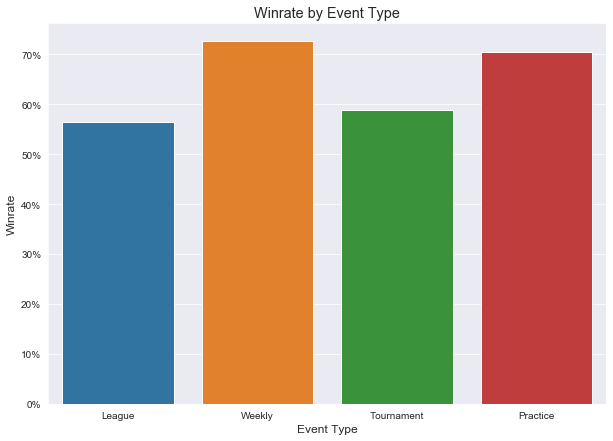

In [56]:
sns.set_style('darkgrid')

event_wr = find_winrates('Tournament')
plt.figure(figsize=(10,7))
ax = sns.barplot(data=event_wr, x='Category', y='Winrate')
plt.title('Winrate by Event Type', size='x-large')
plt.xlabel('Event Type', size='large')
plt.ylabel('Winrate', size='large')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

[Text(0, 0, '1st'),
 Text(0, 0, '2nd'),
 Text(0, 0, '3rd'),
 Text(0, 0, '4th'),
 Text(0, 0, '5th'),
 Text(0, 0, '6th'),
 Text(0, 0, '7th'),
 Text(0, 0, '8th'),
 Text(0, 0, '9th'),
 Text(0, 0, '10th')]

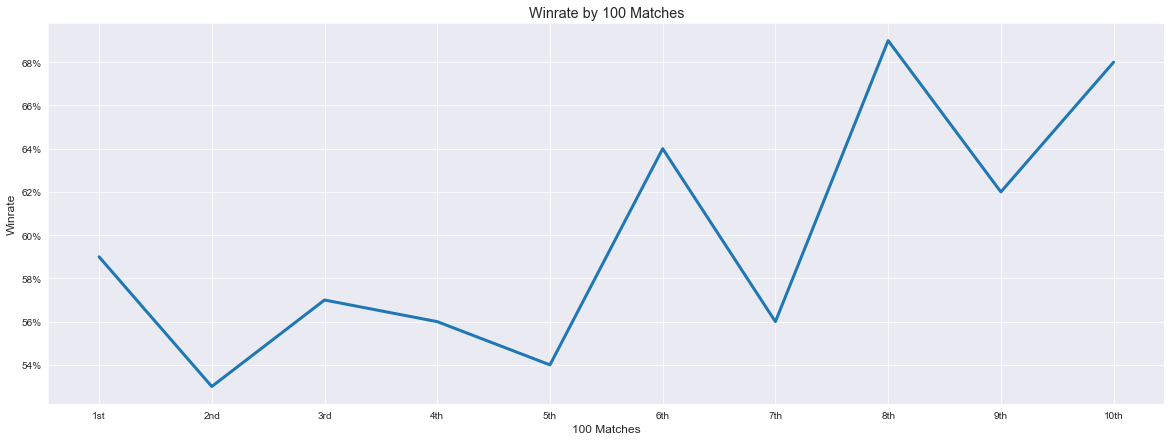

In [65]:
by100_wr = find_winrates('by100')

plt.figure(figsize=(20,7))
ax = sns.lineplot(data=by100_wr, x='Category', y='Winrate', linewidth=3)
plt.title('Winrate by 100 Matches', size='x-large')plt..xlabel('100 Matches', size='large')
plt.ylabel('Winrate', size='large')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th'])

[Text(0, 0, '50%'),
 Text(0, 0, '52%'),
 Text(0, 0, '54%'),
 Text(0, 0, '56%'),
 Text(0, 0, '58%'),
 Text(0, 0, '60%'),
 Text(0, 0, '62%'),
 Text(0, 0, '64%'),
 Text(0, 0, '66%'),
 Text(0, 0, '68%')]

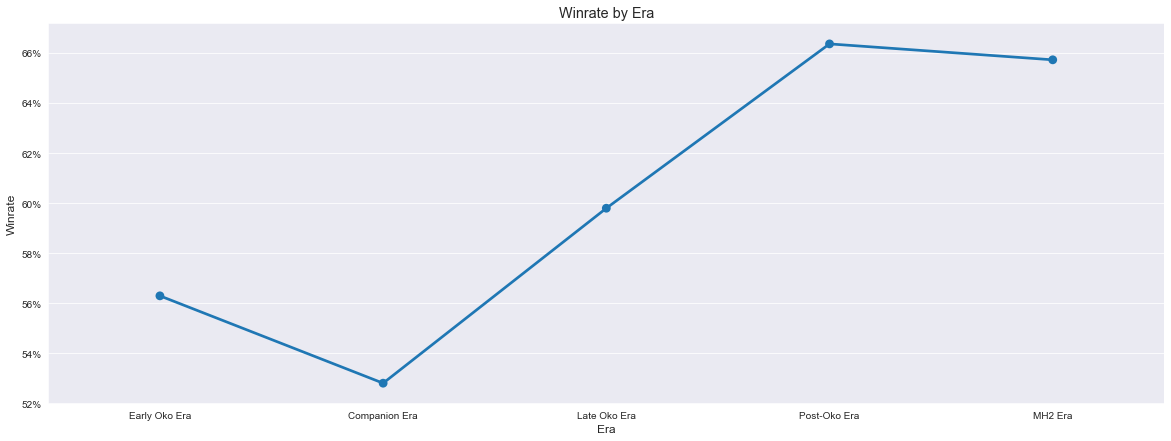

In [80]:
era_wr = find_winrates('era')
era_wr = era_wr.sort_values(by='Category', key=lambda x: x.map({'Early Oko Era':0, 'Companion Era':1, 'Late Oko Era':2, 'Post-Oko Era': 3, 'MH2 Era':4}))

plt.figure(figsize=(20,7))
ax = sns.pointplot(data=era_wr, x='Category', y='Winrate', linewidth=3)
plt.title('Winrate by Era', size='x-large')
plt.xlabel('Era', size='large')
plt.ylabel('Winrate', size='large')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

In [83]:
pd_wr = find_winrates('Play / Draw')
pd_wr

,Category,Winrate,Total Matches
1,D,0.618677,514
0,P,0.576132,486


In [87]:
df['My Deck Cleaned'] = df['My Deck'].map(lambda x: 'Jund Lands' if x == 'Lurrus Jund' else 'RUG Lands' if x == 'RUG Uro Lands' else 'RUG Lands' if x == 'RGu Lands' else 'UG Uro Lands' if x == 'UG Uro' else 'Other' if x == 'Bant Lands' or x == 'Dark Queen Lands' or x == 'BG Algae Lands' or x == 'Junk Lands' or x == 'CI Bant Lands' or x == 'WURG Lands' or x == 'BUG Bird Lands' or x == 'Sphere Lands' or x == 'Daze Lands' or x == 'Horny Lands' or x == 'GW Saga Lands' or x == 'Dune Lands' or x == 'UG Stifle Lands' or x == 'Karn Lands' or x == 'Karn Intuition' or x == 'Gaak Lands' or x == 'BUGr Lands' else 'Naya Lands' if x == "Naya Sevinne's Lands" else 'BG Lands' if x == 'BG Tireless Lands' else 'RG Lands' if x == ' RG Lands' or x == 'RG Lands ' else x)

deck_wr = fifind_winrates('My Deck Cleaned')
deck_wr

,Category,Winrate,Total Matches
2,Jund Lands,0.582555,321
1,RG Lands,0.613924,158
0,BUG Lands,0.655172,116
5,RUG Lands,0.657658,111
8,RG Saga Lands,0.675926,108
4,Other,0.452830,106
7,UG Uro Lands,0.472222,36
3,BG Lands,0.636364,33
6,Naya Lands,0.545455,11


[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%'),
 Text(0, 0, '70%'),
 Text(0, 0, '80%')]

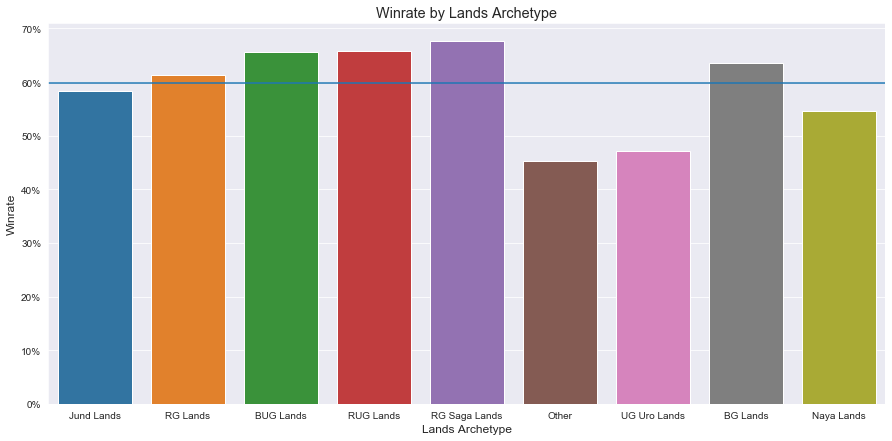

In [93]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=deck_wr, x='Category', y='Winrate')
ax.axhline(0.598)
plt.title('Winrate by Lands Archetype', size='x-large')
plt.xlabel('Lands Archetype', size='large')
plt.ylabel('Winrate', size='large')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

In [103]:
matchup_wr = find_winrates('Opp Category Cleaned')
matchup_wr

,Category,Winrate,Total Matches
12,Brew/Other,0.612069,232
2,Delver,0.629630,135
9,Tribal,0.764706,85
5,Graveyard,0.662338,77
7,Non-W Control,0.641791,67
6,Storm,0.380952,63
14,UW,0.508772,57
0,Show & Tell,0.444444,45
10,White Creatures,0.666667,42
8,Knight,0.486486,37


[Text(0, 0, 'Brew/Other'),
 Text(0, 0, 'Delver'),
 Text(0, 0, 'Tribal'),
 Text(0, 0, 'Graveyard'),
 Text(0, 0, 'Non-W Control'),
 Text(0, 0, 'Storm'),
 Text(0, 0, 'UW'),
 Text(0, 0, 'Show & Tell'),
 Text(0, 0, 'White Creatures'),
 Text(0, 0, 'Knight'),
 Text(0, 0, 'Big Mana'),
 Text(0, 0, 'Chalice'),
 Text(0, 0, 'Doomsday'),
 Text(0, 0, 'Lands'),
 Text(0, 0, 'BGx Depths'),
 Text(0, 0, 'GW Depths'),
 Text(0, 0, 'Combo-Control'),
 Text(0, 0, 'Jeskai Tempo')]

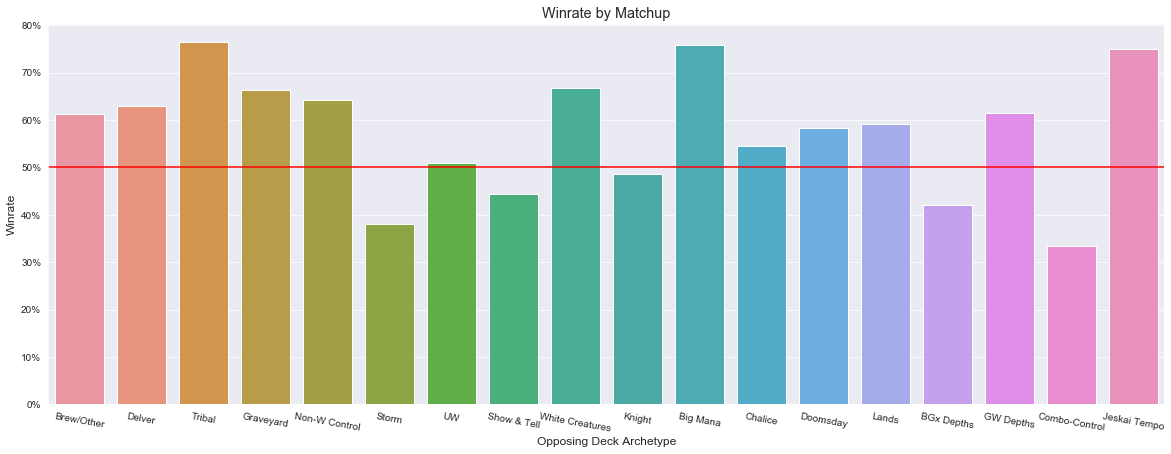

In [109]:
plt.figure(figsize=(20, 7))
ax = sns.barplot(data=matchup_wr, x='Category', y='Winrate')
# ax.axhline(0.598, color='blue')
ax.axhline(0.5, color='red')
plt.title('Winrate by Matchup', size='x-large')
plt.xlabel('Opposing Deck Archetype', size='large')
plt.ylabel('Winrate', size='large')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_xticklabels(matchup_wr['Category'], rotation=-10)

In [110]:
pd_wr = find_winrates('Opp Category')
pd_wr

,Category,Winrate,Total Matches
12,Brew/Other,0.581560,141
2,Delver,0.629630,135
9,Tribal,0.764706,85
5,Graveyard,0.662338,77
7,Non-W Control,0.641791,67
6,Storm,0.380952,63
14,UW,0.508772,57
0,Show & Tell,0.444444,45
10,White Creatures,0.666667,42
8,Knight,0.486486,37
